Imports

In [1]:
import spikeinterface.extractors as se
import neo

Try to load data

In [ ]:
spike2_file_path = "C:/Users/MEA-User/Documents/Multi Channel DataManager/2025-09-08T13-10-30AH-BrainOrganoid-Brainphys-10 min_B-00023.smrx"

In [9]:
reader = neo.io.Spike2IO(filename=spike2_file_path)
# Read the block
data = reader.read()[0]

In [10]:
data

Block with [<neo.core.segment.Segment object at 0x000002B652198460>] segments
annotations: {'system_id': 13907}
file_origin: 'C:/Users/MEA-User/Documents/Multi Channel DataManager/2025-09-08T13-10-30AH-BrainOrganoid-Brainphys-10 min_B-00023.smrx'
# segments (N=[<neo.core.segment.Segment object at 0x000002B652198460>])
0: Segment with  annotations: {'system_id': 13907} # analogsignals (N=[])

Kilosort

In [7]:
from kilosort import run_kilosort

In [ ]:
run_kilosort(filename)

SPKIT

In [8]:
import spkit as sp

In [9]:
files_name = "C:/Users/MEA-User/Documents/Multi Channel DataManager/2025-09-08T13-10-30AH-BrainOrganoid-Brainphys-10 min_B-00023.h5"

----------------------------------------------------------------------------------------------------
file name
C:/Users/MEA-User/Documents/Multi Channel DataManager/2025-09-08T13-10-30AH-BrainOrganoid-Brainphys-10 min_B-00023.h5
----------------------------------------------------------------------------------------------------
500 ms of duration after stimulus is selected, to change it set 'dur_after_spike'

Reading File...
base key(s) found in file <KeysViewHDF5 ['Data']>
Shape of Signals:  (60, 2406000)
- #Channels    = 60
- Duration (s) = 96.24


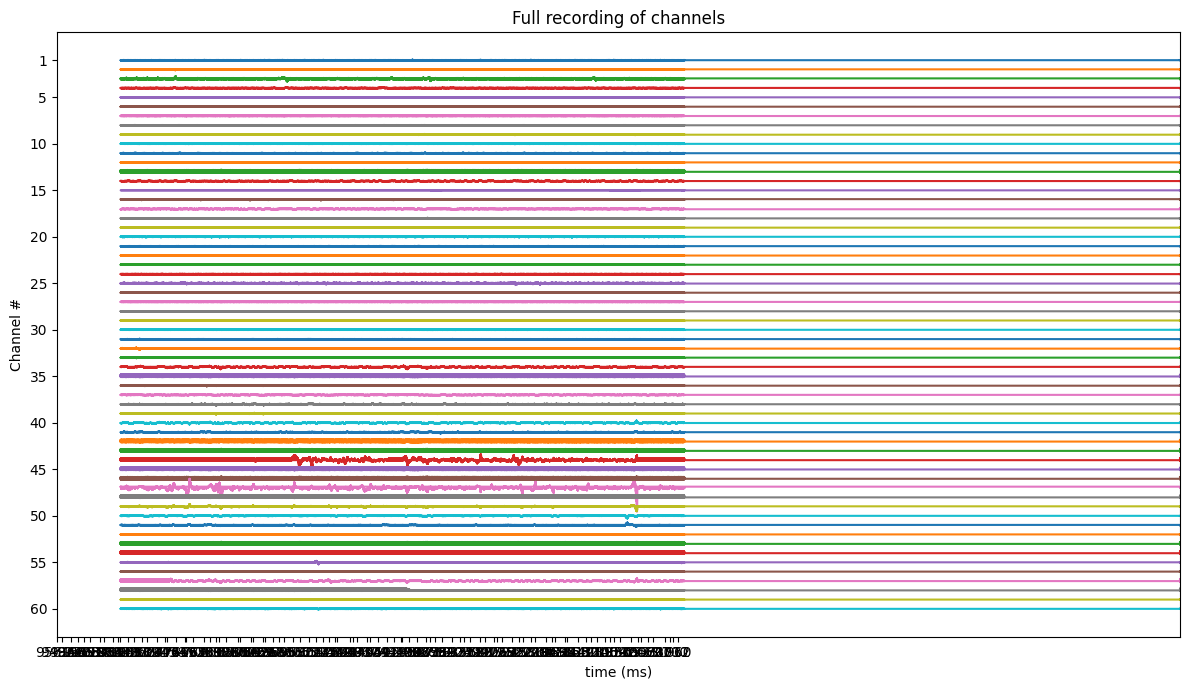

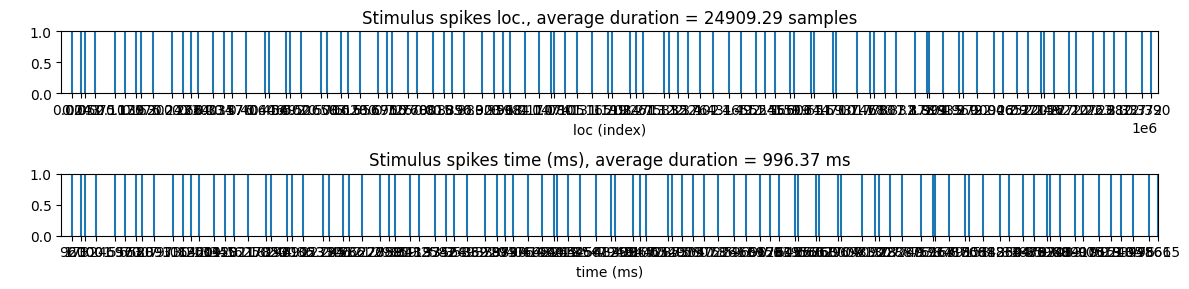

TypeError: list indices must be integers or slices, not list

In [10]:
sp.mea.analyse_mea_file(files_name,stim_fhz=1)


Spikeinterface

In [15]:
from pathlib import Path
from spikeinterface.extractors import read_edf


In [12]:
file_path = "C:/Users/MEA-User/Documents/Multi Channel DataManager/2025-09-08T14-02-20AH-3Delectrode-BrainOrganoid-Brainphys-5min_B-00023.edf"

In [13]:
filepath = Path(file_path)       # NOTE: You must change this


In [16]:
recording = read_edf(filepath)


In [17]:
recording

EDFRecordingExtractor: 60 channels - 20.0kHz - 1 segments - 11,106,000 samples 
                       555.30s (9.25 minutes) - int16 dtype - 1.24 GiB
  file_path: C:\Users\MEA-User\Documents\Multi Channel DataManager\2025-09-08T14-02-20AH-3Delectrode-BrainOrganoid-Brainphys-5min_B-00023.edf

In [21]:
from kilosort import io
import numpy as np


In [ ]:
DATA_DIRECTORY = Path('C:/Users/MEA-User/Documents/')  

In [1]:
# Download channel maps for default probes
from kilosort.utils import download_probes
download_probes()

100%|██████████| 555/555 [00:00<?, ?B/s] 
100%|██████████| 2.03k/2.03k [00:00<?, ?B/s]
100%|██████████| 2.00k/2.00k [00:00<00:00, 2.01MB/s]


In [ ]:
from kilosort import run_kilosort

# NOTE: 'n_chan_bin' is a required setting, and should reflect the total number
#       of channels in the binary file. For information on other available
#       settings, see `kilosort.run_kilosort.default_settings`.
SAVE_PATH = "testnp.bin"
settings = {'filename': SAVE_PATH, 'n_chan_bin': 0}

ops, st, clu, tF, Wall, similar_templates, is_ref, est_contam_rate, kept_spikes = \
    run_kilosort(
        settings=settings, probe_name='NeuroPix1_default.mat',
        # save_preprocessed_copy=True
        )

kilosort.run_kilosort: Kilosort version 4.1.1
kilosort.run_kilosort: Python version 3.10.18
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.26100-SP0 AMD64
kilosort.run_kilosort: Intel64 Family 6 Model 198 Stepping 2, GenuineIntel
kilosort.run_kilosort: Using CPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting [WindowsPath('testing.bin')]
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort: Encountered error in `run_kilosort`:
Traceback (most recent call last):
  File "c:\Users\MEA-User\anaconda3\envs\mea-proj\lib\site-packages\kilosort\run_kilosort.py", line 247, in _sort
    raise ValueError(
ValueError: Largest value of chanMap exceeds channel count of data, make sure chanMap i

ValueError: Largest value of chanMap exceeds channel count of data, make sure chanMap is 0-indexed.

Try reading again from Kilosort